In [5]:
import pandas as pd

url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(url)

x = data['YearsExperience']
y = data['Salary']

In [7]:
#建立計算斜率的函式
def compute_gradient(x,y,w,b):
    w_gradient = (x*(w*x+b-y)).mean()#微分過後之結果
    b_gradient = ((w*x+b-y)).mean()#微分過後之結果
    return w_gradient, b_gradient

In [8]:
#創建一個計算cost function的函式(計算各資料點和預測線之間的距離)
def compute_cost(x, y, w, b):
    y_pred = x*w + b
    cost = (y-y_pred)**2
    cost = cost.sum()/len(x)
    
    return cost

### **gradient descent**
是一種優化算法，用於尋找函數的最小值或最大值。在機器學習和數據科學中，梯度下降通常用於最小化損失函數，以找到模型的最佳參數。(**根據斜率改變參數**)
### **learning rate**
是梯度下降算法中的一個關鍵超參數，用於控制每次更新參數的步長。具體來說，學習率決定了我們在參數空間中向著最小化損失函數的方向邁出的**步伐大小**。

In [19]:
w=0#從0開始(自訂)
b=0#從0開始(自訂)
learning_rate = 0.001#(自訂)

def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter):
    
    c_hist = []
    w_hist = []
    b_hist = []
    
    w = w_init
    b = b_init
    
    for i in range(run_iter):
        w_grediant, b_grediant = compute_gradient(x,y,w,b)

        #透過gradient descent來更新w和b的值
        w = w-w_grediant*learning_rate
        b = b-b_grediant*learning_rate
        #計算新的cost
        cost = compute_cost(x,y,w,b)
        #把產出的值存入陣列之中
        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)
        #避免output過多只顯示每1000次的結果
        if i%p_iter ==0:
            print(f'Interation:{i:5} : Cost:{cost: .2e}, w:{w: .2e}, b:{b: .2e}, w_gradient:{w_grediant: .2e}, b_gradient:{b_grediant: .2e}')
            #空格.2e表示於左側填充空格(用於對齊)並只顯示以科學記號表示小數點後2位數的結果
    return w, b, w_hist, b_hist, c_hist

In [20]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000
p_iter = 1000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter, p_iter)

Interation:    0 : Cost: 5.66e+03, w: 4.36e-01, b: 7.26e-02, w_gradient:-4.36e+02, b_gradient:-7.26e+01
Interation: 1000 : Cost: 1.41e+02, w: 1.21e+01, b: 8.07e+00, w_gradient: 8.00e-01, b_gradient:-5.32e+00
Interation: 2000 : Cost: 9.61e+01, w: 1.14e+01, b: 1.27e+01, w_gradient: 6.12e-01, b_gradient:-4.08e+00
Interation: 3000 : Cost: 6.97e+01, w: 1.09e+01, b: 1.63e+01, w_gradient: 4.69e-01, b_gradient:-3.12e+00
Interation: 4000 : Cost: 5.43e+01, w: 1.05e+01, b: 1.91e+01, w_gradient: 3.59e-01, b_gradient:-2.39e+00
Interation: 5000 : Cost: 4.52e+01, w: 1.02e+01, b: 2.12e+01, w_gradient: 2.75e-01, b_gradient:-1.83e+00
Interation: 6000 : Cost: 3.99e+01, w: 9.91e+00, b: 2.28e+01, w_gradient: 2.10e-01, b_gradient:-1.40e+00
Interation: 7000 : Cost: 3.68e+01, w: 9.73e+00, b: 2.40e+01, w_gradient: 1.61e-01, b_gradient:-1.07e+00
Interation: 8000 : Cost: 3.50e+01, w: 9.59e+00, b: 2.49e+01, w_gradient: 1.23e-01, b_gradient:-8.22e-01
Interation: 9000 : Cost: 3.39e+01, w: 9.48e+00, b: 2.57e+01, w_g

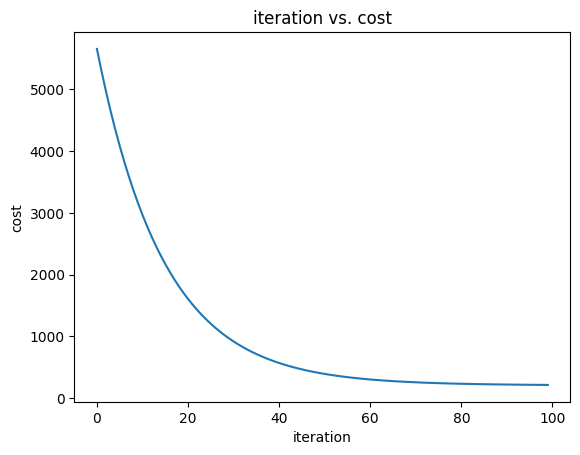

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), c_hist[:100])
plt.title('iteration vs. cost')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [23]:
print(f'最終的w:({w_final:.2f}), b:({b_final:.2f})')

最終的w:(9.14), b:(27.89)


In [28]:
print(f'年資3.5年的預測薪水{w_final*3.5 + b_final:.1f}K')
print(f'年資5.9年的預測薪水{w_final*5.9 + b_final:.1f}K')

年資3.5年要給他59.9K
年資5.9年要給他81.8K


In [34]:
#同時考慮w和b對於cost function的影響之值
import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i=0
for w in ws:
    j=0
    for b in bs:
        cost = compute_cost(x,y,w,b)
        costs[i,j] = cost
        j=j+1
    i=i+1
    
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

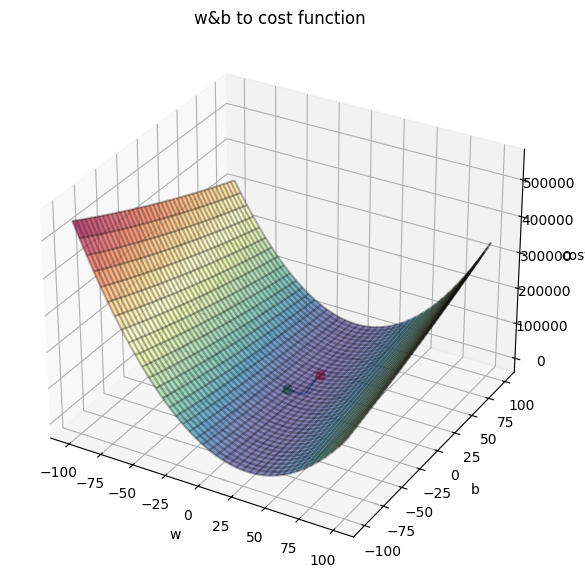

當w=[9], b=[29] 會有最小cost:[32.69484848]


In [37]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
#ax.view_init(0,-120)#旋轉角度(上下旋轉角度, 左右旋轉角度)
b_grid, w_grid = np.meshgrid(bs, ws)#將一維陣列轉換為二維網格
ax.plot_surface(w_grid, b_grid, costs, cmap='Spectral_r', alpha=0.7)
#曲面本身(x軸的2D資料,y軸的2D資料,z軸的2D資料,顏色,透明度)
ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.3)
#曲面邊框(x軸的2D資料,y軸的2D資料,z軸的2D資料,顏色,透明度)
ax.set_title('w&b to cost function')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color='red', s=40)

ax.plot(w_hist, b_hist, c_hist)#畫出此三值的變化曲線(根據初始點和學習率不同)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color='green', s=40)#開始descent的起點
plt.show( )

print(f'當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}')